![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [7]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


## Librerias

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Tratamiento a variables Dummies

In [9]:
dTrain =  dataTraining.copy()
dTest = dataTesting.copy()

In [10]:
dTrain = pd.get_dummies(dTrain)
dTest = pd.get_dummies(dTest)

## Conjunto de entrenamiento y validación del modelo

In [11]:
XTotal = dTrain.drop(columns ={"Price"})
yTotal = dTrain["Price"]
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

## EDA 

In [78]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Mileage'}>, <AxesSubplot:>]],
      dtype=object)

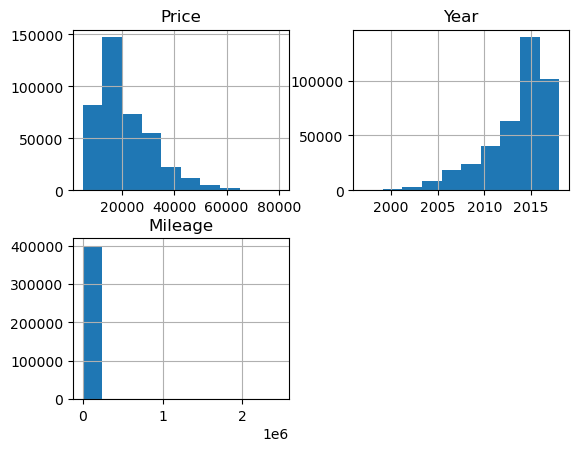

In [79]:
dataTraining.hist()

NameError: name 'plt' is not defined

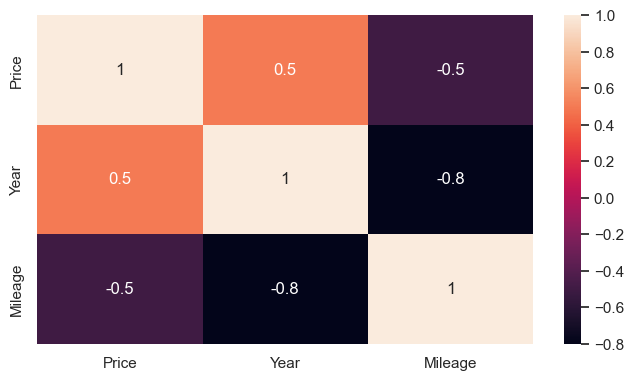

In [80]:
matrix_corr = pd.DataFrame(dataTraining).corr().round(1)
sns.set(rc={'figure.figsize':(8,4.27)})
sns.heatmap(matrix_corr, annot=True)
plt.show()

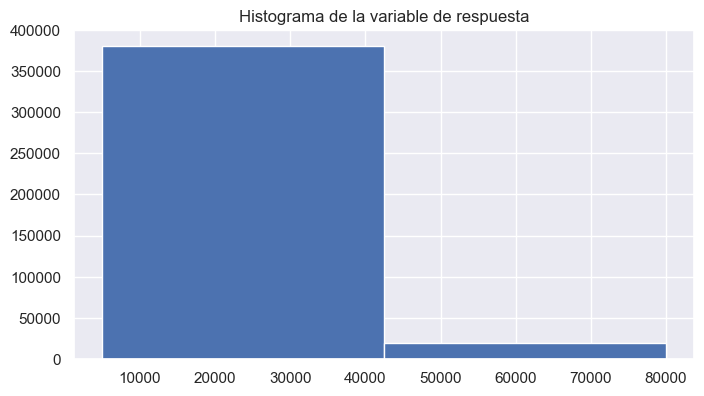

<Figure size 400x400 with 0 Axes>

In [83]:
plt.hist(dataTraining['Price'], bins=2)
mensaje = ['Histograma de la variable de respuesta']
plt.title(" ".join(mensaje))
plt.figure(figsize=(4,4))
plt.show()

In [12]:
dataTraining

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler
...,...,...,...,...,...,...
399995,29900,2015,25287,TX,Lexus,RXRX
399996,17688,2015,17677,MI,Chevrolet,EquinoxFWD
399997,24907,2014,66688,NC,Buick,EnclaveLeather
399998,11498,2014,37872,IN,Volkswagen,Jetta


#### Distribución de variables Categoricas

<AxesSubplot:xlabel='Make', ylabel='Price'>

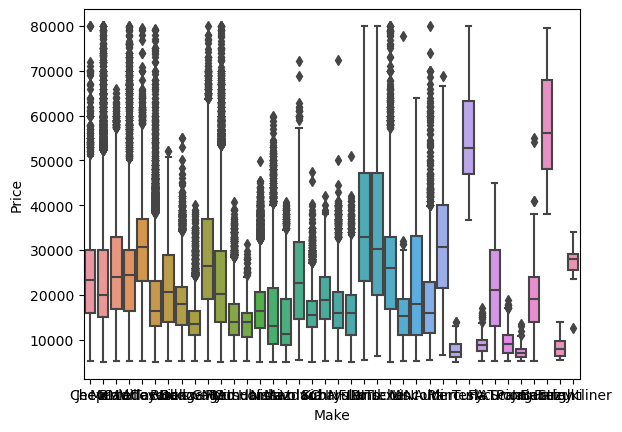

In [13]:
sns.boxplot(x=dataTraining["Make"], y=dataTraining["Price"])

<AxesSubplot:xlabel='Model', ylabel='Price'>

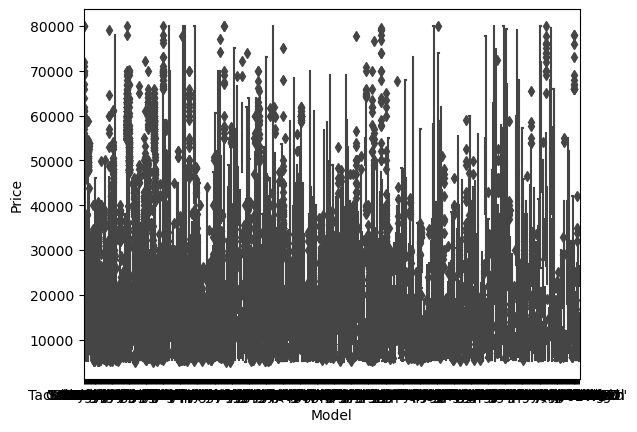

In [14]:
sns.boxplot(x=dataTraining["Model"], y=dataTraining["Price"])

<AxesSubplot:xlabel='State', ylabel='Price'>

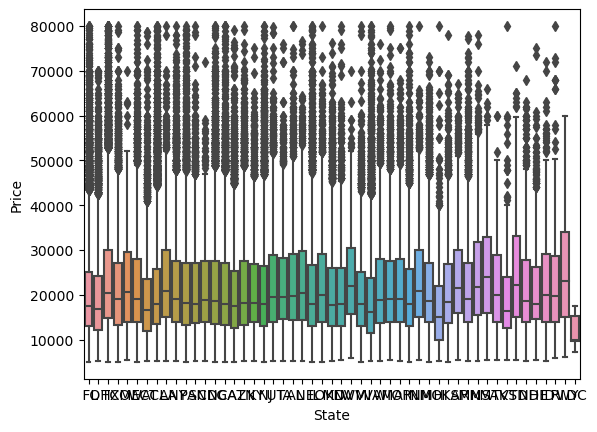

In [15]:
sns.boxplot(x=dataTraining["State"], y=dataTraining["Price"])

In [17]:
dataTraining.describe()

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


In [18]:
dataTraining['Price'].mean()

21146.9193125

## Calibración XGBoost

In [19]:
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [20]:
param_grid = {"max_depth":    [7, 8],
              "n_estimators"  = [700,800],
              "learning_rate": [0.02, 0.1, 0.2]}

In [21]:
search = GridSearchCV(regressor, param_grid, cv=3).fit(XTrain, yTrain)
print("Mejores Parametros ",search.best_params_)

Mejores Parametros  {'learning_rate': 0.1, 'max_depth': 8}


In [23]:
regressor=xgb.XGBRegressor(learning_rate = 0.1,
                           n_estimators  = 700,
                           max_depth     = 8,
                           eval_metric='rmsle')


In [24]:
regressor.fit(XTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
y_pred = regressor.predict(XTest)

In [27]:
from sklearn.metrics import mean_squared_error 

In [28]:
mse = mean_squared_error(yTest, y_pred, squared=False)
mse

3647.347417163542

In [48]:
XTrain

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
219421,2012,52027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187898,2015,18127,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298770,2013,122197,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217760,2014,38003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195247,2015,49464,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,2012,41501,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358083,2010,77127,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152315,2015,34896,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117952,2016,3946,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
dTest['Make_Freightliner']=0

In [36]:
col1 = dTest.columns
col2 = XTrain.columns

In [53]:
XTest

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
242160,2010,115991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3413,2014,48093,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393024,2016,5494,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247987,2016,43217,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52436,2013,37664,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239061,2010,167325,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237666,2013,63520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40562,2016,32595,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136654,2017,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Identificar que modelos en Test no estan en Train
for colu in col2:
    if colu in col1:
        print("True")
    else:
        print(colu)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [87]:
# Guardar respuesta para Kaggle
output = pd.DataFrame({"Id":dTest.index, "Price":predictions})
output.to_csv('submission3.csv', index=False)

# Segunda calibración de hiperparametros

Al identificar que la mejor solución fue generada por una mayor tasa de aprendizaje se aumenta el valor maximo para probar con una tasa de 0.2, adicional probar el cambio del hiperparametro n_estimators entre 500 y 700

In [ ]:
param_grid = {"max_depth":    [7, 8],
              "n_estimators"  = [500,700],
              "learning_rate": [0.1, 0.2]}

In [54]:
regressor=xgb.XGBRegressor(learning_rate = 0.2,
                           n_estimators  = 700,
                           max_depth     = 8,
                           eval_metric='rmsle')

In [56]:
y_pred = regressor.predict(XTest)

In [57]:
mse = mean_squared_error(yTest, y_pred, squared=False)
mse

3517.54262071653

In [60]:
col_test = dTest.columns
col_train = XTrain.columns

In [63]:
dTest['Make_Freightliner'] = np.uint8(0)
df_test = pd.DataFrame()
for col in col_train:
    df_test[col] = dTest[col]
df_test = df_test.reset_index()
df_test = df_test.drop(columns ={'ID'})
y_pred2 = regressor.predict(df_test)
predictions = regressor.predict(df_test)
output = pd.DataFrame({"Id":dTest.index, "Price":predictions})
output.to_csv('submission_7.csv', index=False)

**Puntaje Kagle del submission 7  ->3484.43956**

## Ajuste Learning Rate 

Probamos subiendo la tasa de aprendizaje a 0.25

In [66]:
regressor=xgb.XGBRegressor(learning_rate = 0.25,
                           n_estimators  = 700,
                           max_depth     = 8,
                           eval_metric='rmsle')

In [67]:
regressor.fit(XTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_pred = regressor.predict(XTest)

In [70]:
mse = mean_squared_error(yTest, y_pred, squared=False)
mse

3514.8601574579166

In [90]:
## *No se ha subido a Kagle* puede tener mejor respuesta

In [ ]:
# Transformación de dtest para añadir variable Make_Freightliner
dTest['Make_Freightliner'] = np.uint8(0)
df_test = pd.DataFrame()
for col in col_train:
    df_test[col] = dTest[col]
df_test = df_test.reset_index()
df_test = df_test.drop(columns ={'ID'})
y_pred2 = regressor.predict(df_test)
predictions = regressor.predict(df_test)
output = pd.DataFrame({"Id":dTest.index, "Price":predictions})
output.to_csv('submission_7.csv', index=False)

## Prueba Adicional 

In [74]:
regressor2=xgb.XGBRegressor(learning_rate = 0.25,
                           n_estimators  = 700,
                           max_depth     = 9,
                           eval_metric='rmsle')

In [75]:
regressor2.fit(XTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
y_pred = regressor2.predict(XTest)

In [77]:
mse = mean_squared_error(yTest, y_pred, squared=False)
mse

3521.115208938433

## Eliminar Estado

Se realiza la prueba eliminando la variable 'State' pero el mejor mse conseguio con la mejora de hiperparametros es de 4200

In [16]:
dTrain =  dataTraining.copy()
dTest = dataTesting.copy()

dTrain = dTrain[['Price','Year','Mileage','Make','Model']]
dTest = dTest[['Year','Mileage','Make','Model']]

dTrain = pd.get_dummies(dTrain)
dTest = pd.get_dummies(dTest)

XTotal = dTrain.drop(columns ={"Price"})
yTotal = dTrain["Price"]

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)